## Our client is one of the biggest restaurants in Lagos, Nigeria, Mama Tee Restaurant.

The objective of the regression task is to predict the amount of tip (gratuity in Nigeria naira) given to a food server based on total_bill, gender, smoker (whether they smoke in the party or not), day (day of the week for the party), time (time of the day whether for lunch or dinner), and size (size of the party) in Mama Tee restaurant.

Label: The label for this problem is tip.

Features: There are 6 features and they include total bill, gender, smoker, day, time, and size



In [1]:
#hiding irrelevant warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the required libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [3]:
#importing the dataset into jupyter notebook
tip = pd.read_csv('tips.csv')

In [4]:
#getting the first 5 rows of the dataset
tip.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [5]:
#getting the last 5 rows of the dataset
tip.tail()

,total_bill,tip,gender,smoker,day,time,size
739,3164.27,645.28,Male,No,Sat,Dinner,3
740,2962.62,218.00,Female,Yes,Sat,Dinner,2
741,2471.03,218.00,Male,Yes,Sat,Dinner,2
742,1942.38,190.75,Male,No,Sat,Dinner,2
743,2047.02,327.00,Female,No,Thur,Dinner,2


In [6]:
#the shape of the dataset, 744 rows and 7 columns
tip.shape

(744, 7)

In [7]:
#the summary of the non-stastical columns in the dataset
tip.describe(include='object')

,gender,smoker,day,time
count,744,744,744,744
unique,2,2,7,2
top,Male,No,Sat,Dinner
freq,409,398,165,427


Inference:
1. The dataset has 744 rows with no missing value in the non-stastical columns.
2. From the table, we observe that the customers are mostly males, most customers are non-smokers and the restaurant has more sales on saturday and during dinner. 

In [8]:
#the summary of the stastical columns in the dataset
tip.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


In [9]:
#the type of data we have in the dataset
tip.dtypes

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
tip.day.value_counts().to_frame()

,day
Sat,165
Sun,140
Thur,134
Fri,79
Tues,78
Mon,75
Wed,73


In [11]:
correlation=tip.corr()

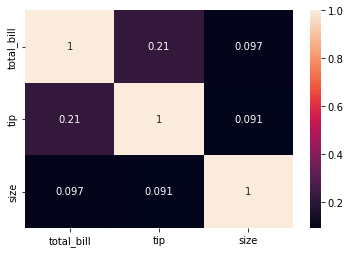

In [12]:
#checking the correlation relation in the dataset
sns.heatmap(correlation,annot=True);

Text(0.5, 1.01, 'Relationship between Data')

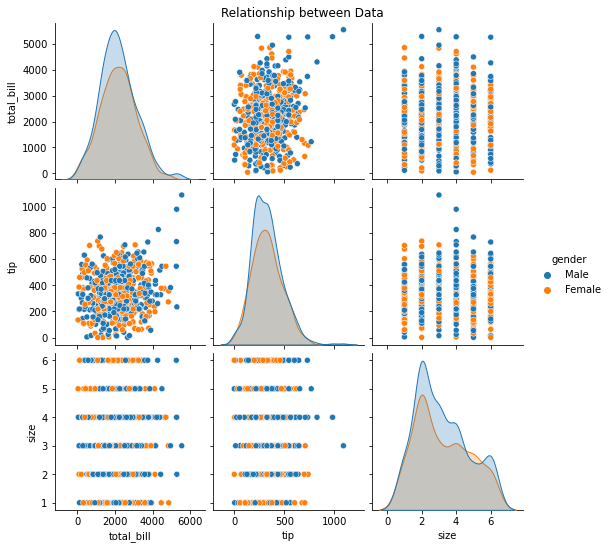

In [13]:
# to visualize the overall relationship of data using pairplot
sns.pairplot(tip,hue="gender").fig.suptitle("Relationship between Data", y=1.01)


Inference:
1. There is a positive correlation between total bill and tip.
2. Males are most likely to pay more.


Text(0.5, 0, 'Size of table')

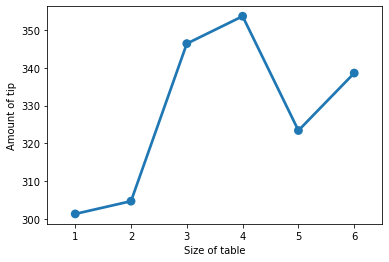

In [14]:
#showing relationship between size of a table and tip
sns.pointplot(x='size', y='tip', data=tip, ci=None)
plt.ylabel("Amount of tip")
plt.xlabel("Size of table")

Inference:
The table with 4 persons tip better

Text(0.5, 0, 'Day of the week')

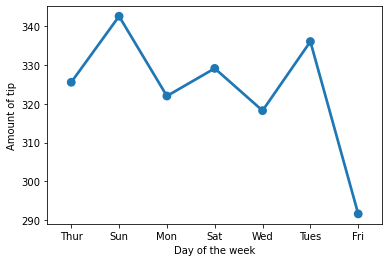

In [15]:
#showing relationship between day of the week and tip
sns.pointplot(x='day', y='tip', data=tip, ci=None)
plt.ylabel('Amount of tip')
plt.xlabel('Day of the week')

Customers actually tip better on Sundays

<AxesSubplot:xlabel='gender', ylabel='tip'>

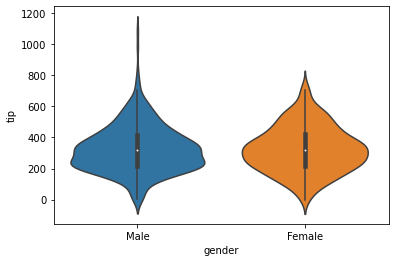

In [16]:
#relationship between gender and tip
sns.violinplot(x='gender', y='tip', data=tip)

Inference:
1. Males tip better
2. Most customers tip between 200 - 415 naria 

Text(0, 0.5, 'Amount of tip')

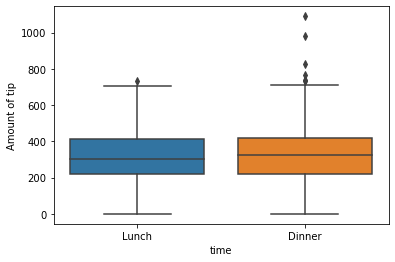

In [17]:
#relationship between gender and tip
sns.boxplot(x = 'time', y = 'tip', data = tip)
plt.ylabel('Amount of tip')

Customers tip better during dinner

<AxesSubplot:xlabel='smoker', ylabel='tip'>

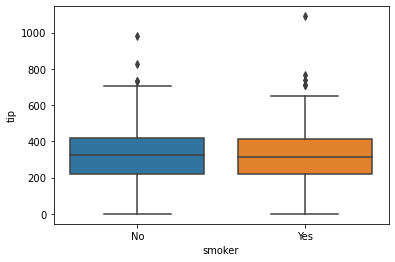

In [18]:
#relationship between gender and tip
sns.boxplot(x="smoker", y="tip", data=tip)

Non-smokers tip better

### Machine learning model

In [19]:
#importing the required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics #For evaluating the model built

In [20]:
# creating a copy of dataset
df = tip.copy()

In [21]:
# spilitng our dataset into feature and target
X = df.drop(['tip'], axis=1) #feature
y = df['tip'] #target

In [22]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [23]:
y.head()

0    360.79
1    259.42
2    274.68
3    337.90
4    567.89
Name: tip, dtype: float64

In [24]:
X = pd.get_dummies(X)
X.head()

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1


In [25]:
X.shape

(744, 15)

In [26]:
# spliting the test and train data into a 75% train size and 25% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                   random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((558, 15), (186, 15), (558,), (186,))

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
#importing the linear model
from sklearn import linear_model 
model = linear_model.LinearRegression()

#fitting the linear model into x_train, y_train
model = model.fit(X_train, y_train)

In [45]:
model.score(X_train, y_train)

0.07205945271832526

In [32]:
X_train

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
527,1383.21,2,0,1,1,0,0,0,1,0,0,0,0,1,0
326,1842.10,3,1,0,1,0,0,0,0,0,0,1,0,0,1
302,1381.03,6,0,1,0,1,0,0,0,0,1,0,0,1,0
110,3168.63,4,1,0,1,0,0,0,1,0,0,0,0,1,0
82,1638.27,4,0,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2059.01,1,1,0,1,0,0,0,0,0,0,1,0,1,0
106,2956.08,4,1,0,0,1,0,0,0,0,0,0,1,1,0
270,1240.42,4,0,1,1,0,0,0,0,0,1,0,0,1,0
435,1978.35,6,0,1,1,0,0,0,0,0,0,0,1,0,1


In [33]:
y_train

527    218.00
326    175.49
302    438.18
110    514.48
82     408.75
        ...  
71      54.50
106    120.99
270    470.88
435    245.25
102    440.36
Name: tip, Length: 558, dtype: float64

In [34]:
X_preds = model.predict(X_train)
pd.Series(X_preds)

0      289.489678
1      318.768941
2      333.927925
3      362.291668
4      302.161258
          ...    
553    330.912972
554    325.617170
555    325.091162
556    296.664564
557    387.538430
Length: 558, dtype: float64

In [35]:
# Calculation of Mean Squared Error (MSE)
train_rmse = mean_squared_error(y_train, X_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 139.85480681519513.


In [36]:
X_test

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
609,1559.79,2,1,0,0,1,0,0,1,0,0,0,0,1,0
539,3408.43,3,0,1,1,0,0,0,1,0,0,0,0,1,0
694,1807.22,2,0,1,0,1,0,0,0,0,1,0,0,0,1
350,2565.86,5,1,0,1,0,0,0,0,0,1,0,0,1,0
174,718.31,5,0,1,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,1366.86,2,0,1,1,0,0,0,0,1,0,0,0,1,0
281,2050.29,4,1,0,0,1,0,0,0,0,0,1,0,1,0
24,2691.21,1,1,0,0,1,0,0,0,0,1,0,0,0,1
198,1384.30,2,0,1,1,0,0,0,0,0,0,1,0,1,0


In [37]:
y_test

609    436.00
539    545.00
694    436.00
350    378.23
174    289.94
        ...  
550    272.50
281    209.28
24     415.29
198    198.38
212    244.16
Name: tip, Length: 186, dtype: float64

In [38]:
y_preds = model.predict(X_test)
pd.Series(y_preds)

0      286.722420
1      363.794714
2      304.649801
3      376.033816
4      256.999577
          ...    
181    315.581752
182    341.193230
183    327.906975
184    314.668036
185    379.693139
Length: 186, dtype: float64

In [39]:
predictions = model.predict(X_test)
predictions[:10]

array([286.72242037, 363.79471416, 304.64980064, 376.03381639,
       256.99957721, 329.56839379, 278.03454624, 359.78378707,
       400.00722563, 291.84562469])

In [40]:
# Calculation of Mean Squared Error (MSE)
test_rmse = mean_squared_error(y_test,y_preds, squared=False)
print('The RMSE loss for the testing set is {}.'.format(test_rmse))

The RMSE loss for the testing set is 157.86699111807022.


In [41]:
#checking the score of x_train, y_train
model.score(X_train, y_train)

0.07205945271832526

In [42]:
mse = metrics.mean_squared_error(y_test, predictions)
print("Mean squared error:", round(mse, 3))

rmse = np.sqrt(mse)
print("Root mean squared error:", round(rmse, 3))

Mean squared error: 24921.987
Root mean squared error: 157.867
